In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from kerastuner import HyperModel
from tensorflow.keras import backend as K




/var/folders/5f/mw_xnd9x5tl4g49nsb64q_pw0000gn/T/ipykernel_71993/2350795232.py:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [2]:
# Create dataframe with diamond csv

df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# Check df data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Check for null values
df.isnull().sum()


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
# Check for values of 0 in continuous variables, which would be equivalent with nulls
zero_count = df.apply(lambda x: (x ==0).sum())
print(zero_count)

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64


In [6]:
# Drop rows with 0 given small number in large dataset

# Replace all 0s with NaNs and drop all rows with NaNs
df.replace(0, np.nan, inplace = True)
df.dropna(inplace = True)

# Confirm all 0s and NaNs gone
zero_count_recheck = df.apply(lambda x: (x == 0).sum())
print(zero_count_recheck)
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
# Drop unnamed column that served as an index
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


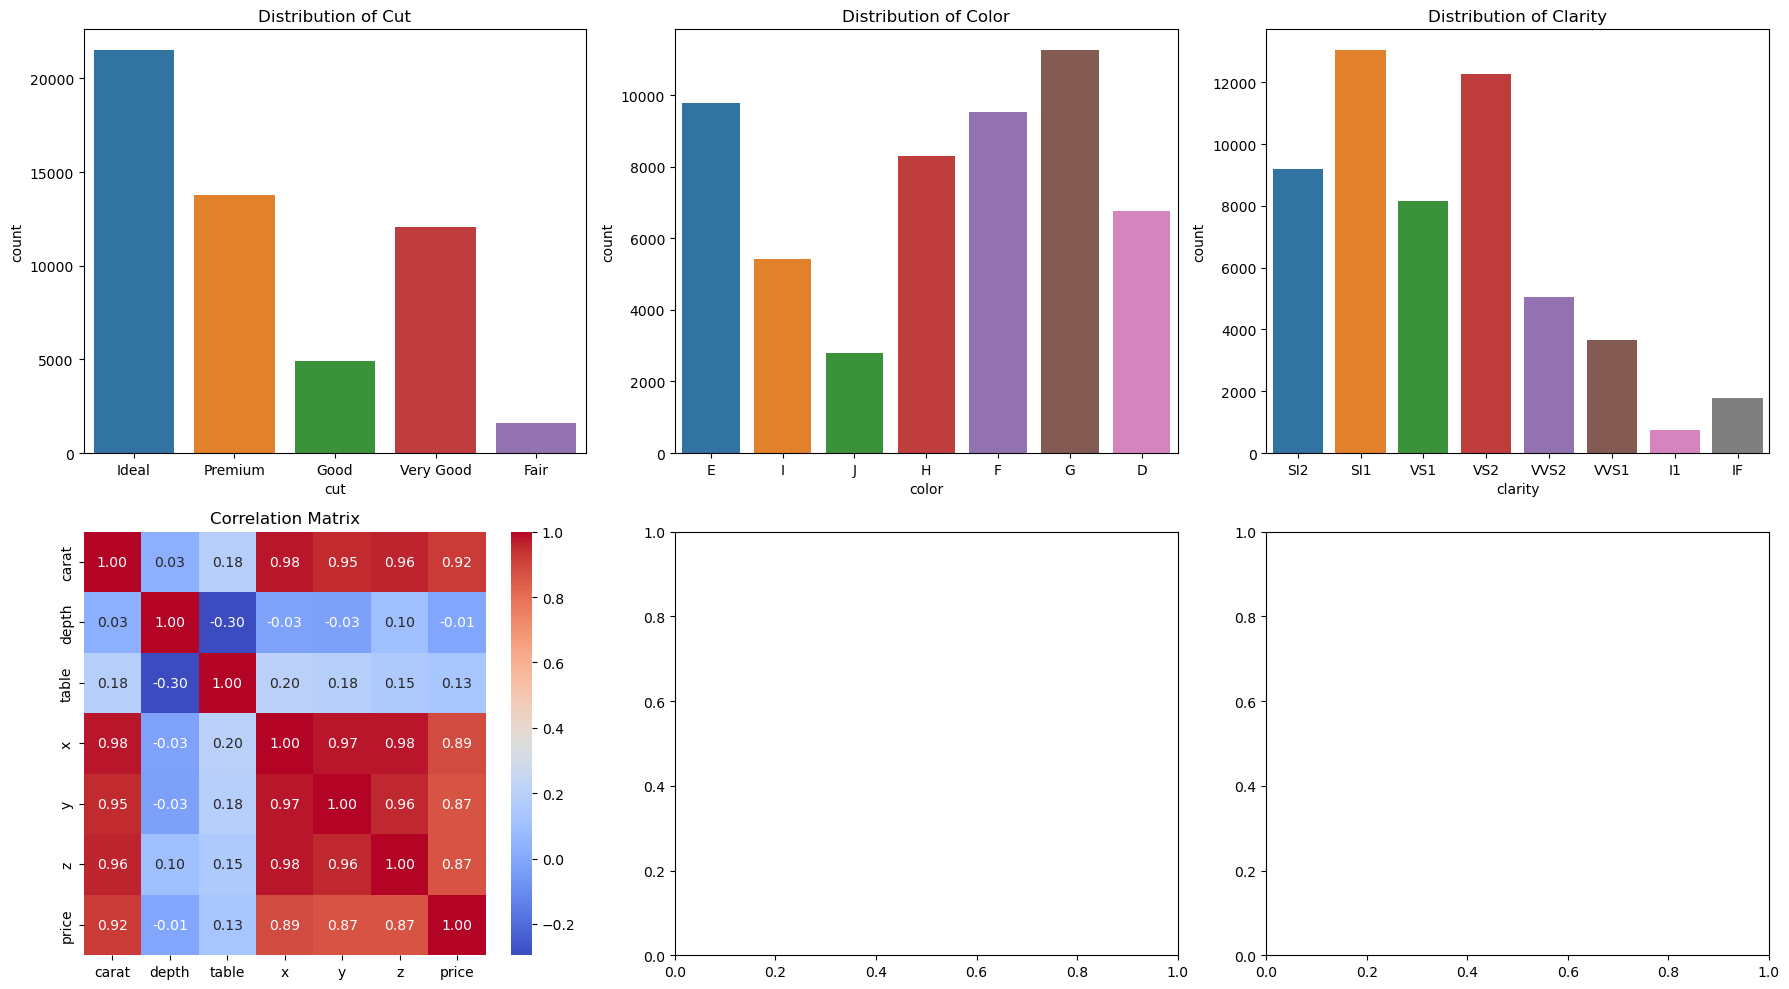

In [8]:
# Plot distributions of categorical features and correlations of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Categorical features
sns.countplot(x='cut', data=df, ax=axes[0,0])
axes[0,0].set_title('Distribution of Cut')

sns.countplot(x='color', data=df, ax=axes[0,1])
axes[0,1].set_title('Distribution of Color')

sns.countplot(x='clarity', data=df, ax=axes[0,2])
axes[0,2].set_title('Distribution of Clarity')

# Correlation matrix of numerical features
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
corr_matrix = df[num_features].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Correlation Matrix')

# Cleanup layout
plt.tight_layout()

# Show plots
plt.show()

In [9]:
# Check summary statistics for numerical values
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# Evaluate relationship between categorical variables and price utilizing ANOVA

# ANOVA for 'cut' and 'price'
anova_cut = ols('price ~ C(cut)', data=df).fit()
anova_table_cut = sm.stats.anova_lm(anova_cut, typ=2)

# ANOVA for 'color' and 'price'
anova_color = ols('price ~ C(color)', data=df).fit()
anova_table_color = sm.stats.anova_lm(anova_color, typ=2)

# ANOVA for 'clarity' and 'price'
anova_clarity = ols('price ~ C(clarity)', data=df).fit()
anova_table_clarity = sm.stats.anova_lm(anova_clarity, typ=2)

anova_table_cut, anova_table_color, anova_table_clarity

(                sum_sq       df           F         PR(>F)
 C(cut)    1.096482e+10      4.0  174.641241  6.632830e-149
 Residual  8.462613e+11  53915.0         NaN            NaN,
                 sum_sq       df         F  PR(>F)
 C(color)  2.678375e+10      6.0  289.8038     0.0
 Residual  8.304424e+11  53913.0       NaN     NaN,
                   sum_sq       df           F         PR(>F)
 C(clarity)  2.327545e+10      7.0  214.953765  2.405720e-316
 Residual    8.339507e+11  53912.0         NaN            NaN)

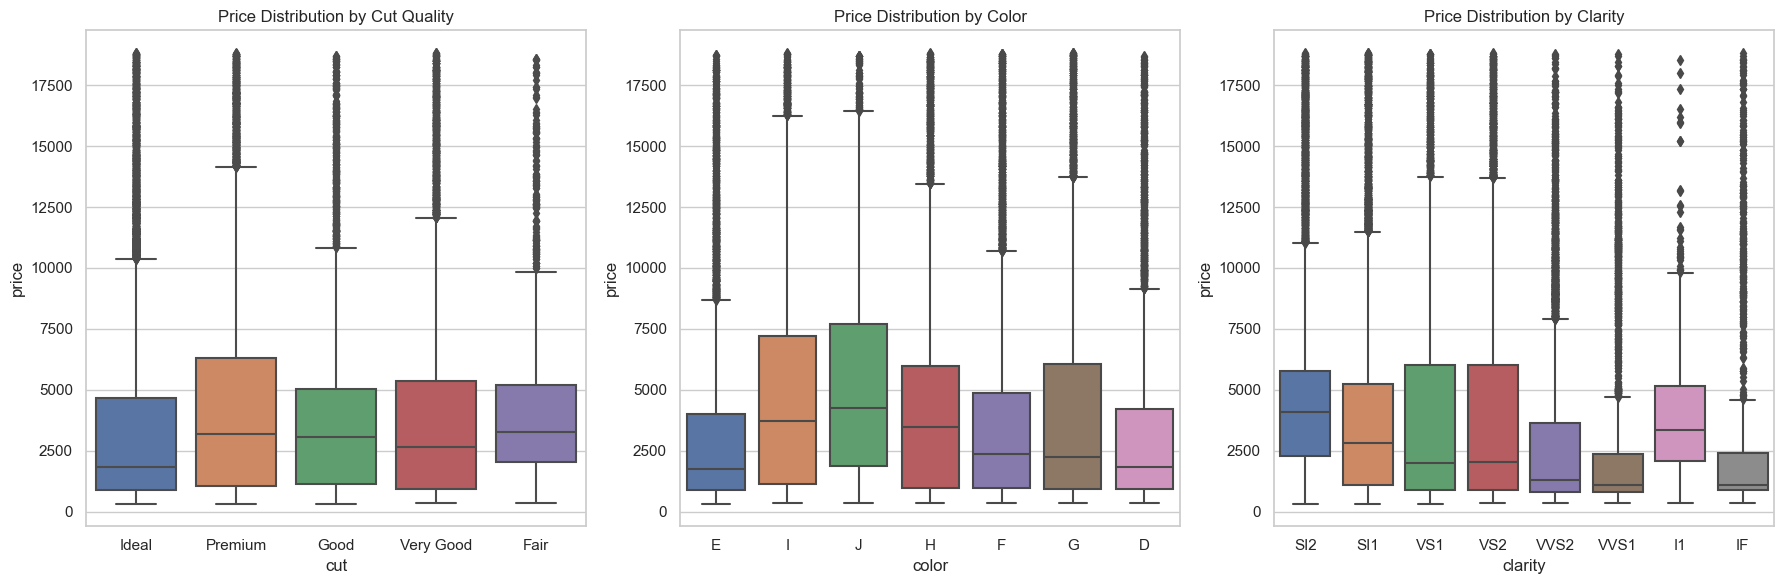

In [11]:
# Visualize relationship between price and different categorical variables 
# Setting style
sns.set(style="whitegrid")

# Creating a figure with 3 subplots for 'cut', 'color', and 'clarity'
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for 'cut' and 'price'
sns.boxplot(x='cut', y='price', data=df, ax=ax[0])
ax[0].set_title('Price Distribution by Cut Quality')

# Box plot for 'color' and 'price'
sns.boxplot(x='color', y='price', data=df, ax=ax[1])
ax[1].set_title('Price Distribution by Color')

# Box plot for 'clarity' and 'price'
sns.boxplot(x='clarity', y='price', data=df, ax=ax[2])
ax[2].set_title('Price Distribution by Clarity')

plt.tight_layout()
plt.show()

In [12]:
# Prepare data for machine learning model building

In [13]:
# Encode categorical varibales 
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

df['cut'] = le_cut.fit_transform(df['cut'])
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])

print(df.dtypes)

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [14]:
# Split output variable and input variables
y = df['price']
X_unscaled = df.copy().drop('price', axis = 1)
print(X_unscaled.head())

   carat  cut  color  clarity  depth  table     x     y     z
0   0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0  4.34  4.35  2.75


In [15]:
# Scale input variables 
mm = MinMaxScaler()
X = mm.fit_transform(X_unscaled)

In [16]:
# Split into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
# Create function to run and evaluate non neural network ML models to predict price

def ML_pipeline(model, X_train, X_test, y_train, y_test):
    # Fit model to training data
    model.fit(X_train, y_train)

    # Predict on train and test data
    preds = model.predict(X_train)
    predictions = model.predict(X_test)


    # Check model performance 
    R2_score_train = r2_score(y_train, preds)
    mae_train =  mean_absolute_error(y_train, preds)
    R2_score_test = r2_score(y_test, predictions)
    mae_test = mean_absolute_error(y_test, predictions)
    return  R2_score_test, mae_test, R2_score_train, mae_train

models = [LinearRegression(), KNeighborsRegressor(n_neighbors=9), RandomForestRegressor(n_estimators=128, random_state=1), ExtraTreesRegressor(n_estimators=128, random_state=1), 
          AdaBoostRegressor(n_estimators=128, random_state=1)]
for m in models:
    R2_score_test, mae_test, R2_score_train, mae_train = ML_pipeline(m, X_train, X_test, y_train, y_test)
    print(f"Model: {m}")
    print(f"Train R2 Score: {R2_score_train}")
    print(f"Test R2 Score: {R2_score_test}")
    print(f"Train MAE: {mae_train}" )
    print(f"Test MAE: {mae_test}" )
    print("")

Model: LinearRegression()
Train R2 Score: 0.8833356297006252
Test R2 Score: 0.8868777413844973
Train MAE: 863.4096565825996
Test MAE: 849.4119851009807

Model: KNeighborsRegressor(n_neighbors=9)
Train R2 Score: 0.9737419031867744
Test R2 Score: 0.9659801190266633
Train MAE: 326.6645588997221
Test MAE: 367.2379863171777

Model: RandomForestRegressor(n_estimators=128, random_state=1)
Train R2 Score: 0.9973122772899722
Test R2 Score: 0.9817750944082206
Train MAE: 101.90772587859676
Test MAE: 266.737406048809

Model: ExtraTreesRegressor(n_estimators=128, random_state=1)
Train R2 Score: 0.9999956241656723
Test R2 Score: 0.9818698332149726
Train MAE: 0.4004113236540907
Test MAE: 263.3307825346965

Model: AdaBoostRegressor(n_estimators=128, random_state=1)
Train R2 Score: 0.8388200084261894
Test R2 Score: 0.8381754467009657
Train MAE: 1342.4635883003295
Test MAE: 1332.5153888894035



In [18]:
# Explore neural network performance 

In [19]:
# Define R2 since not in keras 

def r_squared(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [20]:
# Optimize hyperparameters 

class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = keras.Sequential()
        # First layer
        model.add(keras.layers.Dense(
            units=hp.Int('units_input', min_value=32, max_value=512, step=32),
            activation='relu',
            input_shape=(self.input_shape,)
        ))

        # Additional hidden layers
        for i in range(hp.Int('num_layers', 1, 5)):
            model.add(keras.layers.Dense(
                units=hp.Int(f'units_layer_{i}', min_value=32, max_value=512, step=32),
                activation='relu'
            ))

        # Output layer
        model.add(keras.layers.Dense(1, activation='linear'))

        # Compile model
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='mean_squared_error',
            metrics=['mean_absolute_error', r_squared]
        )
        return model

In [21]:
# Import kerastuner library
import keras_tuner as kt 
from kerastuner.tuners import Hyperband

hypermodel = RegressionHyperModel(input_shape=X_train.shape[1])

tuner = Hyperband(
    hypermodel,
    objective='val_mean_absolute_error',
    max_epochs=10,
    directory='keras_tuner_dir',
    project_name='diamond_price'
)

/Users/samuelvincentneal/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Use kerastuner search for optimal hyperparameters

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Trial 30 Complete [00h 00m 08s]
val_mean_absolute_error: 369.6785888671875

Best val_mean_absolute_error So Far: 366.966552734375
Total elapsed time: 00h 03m 23s


In [23]:
# List best hyperparameterrs

best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'units_input': 256,
 'num_layers': 5,
 'units_layer_0': 128,
 'learning_rate': 0.001,
 'units_layer_1': 128,
 'units_layer_2': 256,
 'units_layer_3': 224,
 'units_layer_4': 224,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0018'}

In [24]:
# Evaluate the model using the test data

best_model_nn = tuner.get_best_models(num_models=1)[0]
test_results = best_model_nn.evaluate(X_test, y_test, verbose=1)
print(f'Test R2 Score: {test_results[2]}')
print(f'Test MAE: {test_results[1]}')

506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 434804.5938 - mean_absolute_error: 354.7365 - r_squared: 0.9707
Test R2 Score: 0.970337450504303
Test MAE: 358.5583190917969


In [25]:
# Train model with optimized hyperparameters for more epochs 

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
nn_model = tuner.hypermodel.build(best_hps)
history_nn = nn_model.fit(X_train, y_train, epochs=200, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=10)])


Epoch 1/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6921374.5000 - mean_absolute_error: 1479.9662 - r_squared: 0.5067
Epoch 2/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1236824.8750 - mean_absolute_error: 614.3065 - r_squared: 0.9165
Epoch 3/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 949553.9375 - mean_absolute_error: 542.1442 - r_squared: 0.9380
Epoch 4/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 683475.5000 - mean_absolute_error: 475.7519 - r_squared: 0.9537
Epoch 5/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 621219.6875 - mean_absolute_error: 454.2558 - r_squared: 0.9584
Epoch 6/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 580494.5625 - mean_absolute_error: 438.7092 - r_squared: 0.9617
Epoch 7/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 558798.9375 - mean_absolute_error: 419.9500 - r_squared: 0.9628
Epoch 8/200
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 526861.2500 - mean_absolute_error: 407.0313 -

In [26]:
# Evaluate on the training and test sets
test_results_nn = nn_model.evaluate(X_test, y_test, verbose =1)
train_results_nn = nn_model.evaluate(X_train, y_train, verbose = 1)
print(f'Train R2 Score: {train_results_nn[2]}')
print(f'Test R2 Score: {test_results_nn[2]}')
print(f'Train MAE: {train_results_nn[1]}')
print(f'Test MAE: {test_results_nn[1]}')


506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 394108.0000 - mean_absolute_error: 306.5797 - r_squared: 0.9738
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - loss: 311366.5000 - mean_absolute_error: 298.2040 - r_squared: 0.9796
Train R2 Score: 0.9786332249641418
Test R2 Score: 0.9757230281829834
Train MAE: 302.8456726074219
Test MAE: 308.55181884765625


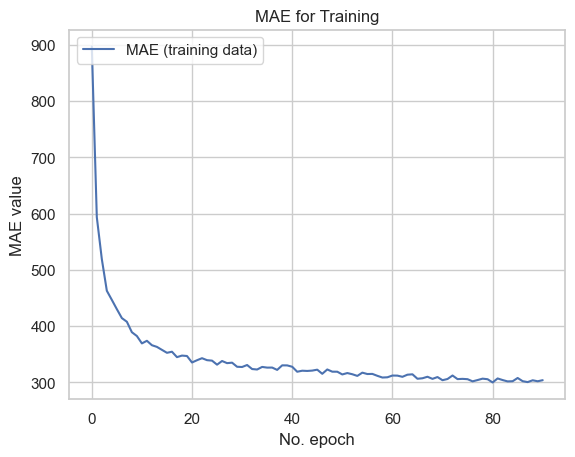

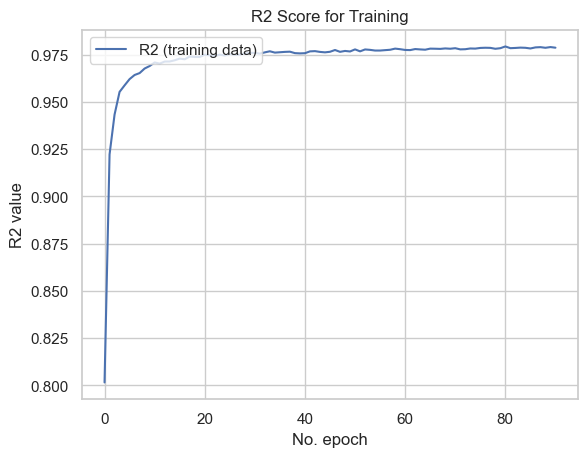

In [27]:
# Plotting MAE
plt.plot(history_nn.history['mean_absolute_error'], label='MAE (training data)')
plt.title('MAE for Training')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plotting R-squared
plt.plot(history_nn.history['r_squared'], label='R2 (training data)')
plt.title('R2 Score for Training')
plt.ylabel('R2 value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [28]:
# Best performing model based on R2: ExtraTreesRegressor. However, clear overfitting based on MAE.
# Check to see if corrects with optimization. 

# Define the model
ETR_model = ExtraTreesRegressor(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [64, 128, 256],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=ETR_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model_ETR = grid_search.best_estimator_

# Check performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=64; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=64; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_es

/Users/samuelvincentneal/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256; total time=   6.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=256; total time=   3.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256; total time=   6.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=256; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=256; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=64; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256; total time=   6.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=64; total time=   0.8s
[CV] END max_depth=Non

In [29]:
# Instantiate the model with the best found parameters
optimized_ETR_model = ExtraTreesRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 256, random_state=2)
# Fit the model on the training data
optimized_ETR_model.fit(X_train, y_train)

# Predict on the test data
y_pred_opt_ETR = optimized_ETR_model.predict(X_test)

# Evaluate the model
test_mae_ETR = mean_absolute_error(y_test, y_pred_opt_ETR)
test_r2_ETR = r2_score(y_test, y_pred_opt_ETR)
y_pred_train_ETR = optimized_ETR_model.predict(X_train)
train_mae_ETR = mean_absolute_error(y_train, y_pred_train_ETR)
train_r2_ETR = r2_score(y_train, y_pred_train_ETR)

print(f"Train R2 Score: {train_r2_ETR}")
print(f"Test R2 Score: {test_r2_ETR}")
print(f"Train MAE: {train_mae_ETR}")
print(f"Test MAE: {test_mae_ETR}")

Train R2 Score: 0.999995622966712
Test R2 Score: 0.9793596394744488
Train MAE: 0.41410652800855136
Test MAE: 285.8890795257929


In [30]:
# Even when optimized ETR clearly still overfit. Based on metrics, K nearest neighbors 
#highest non-neural network performing model with least amount of overfitting. Lets optimize. 

# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 20),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters:", grid_search.best_params_)
best_score = grid_search.best_score_
print("Best cross-validation score (MSE):", -best_score)  

# Use the best model to make predictions
best_knn_model = grid_search.best_estimator_
y_pred_opt_knn = best_knn_model.predict(X_test)
test_mae_knn = mean_absolute_error(y_test, y_pred_opt_knn)
test_r2_knn = r2_score(y_test, y_pred_opt_knn)
y_pred_train_knn = best_knn_model.predict(X_train)
train_mae_knn = mean_absolute_error(y_train, y_pred_train_knn)
train_r2_knn = r2_score(y_train, y_pred_train_knn)

print(f"Train R2 Score: {train_r2_knn}")
print(f'Test R2 Score: {test_r2_knn}')
print(f"Train MAE: {train_mae_knn}")
print(f'Test MAE: {test_mae_knn}')

Fitting 5 folds for each of 114 candidates, totalling 570 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score (MSE): 444259.63315513486
Train R2 Score: 0.9999956242501521
Test R2 Score: 0.9746741322676712
Train MAE: 0.39982513777024165
Test MAE: 320.24444290745095


In [33]:
# K neighbors also clearly overfit when optimized. Best performing model: Optimized Neural Network.  

# Comparison of performance

performance_data = {
    'Algorithm': ['Optimized Neural Network', 'Optimized ExtraTreesRegressor', 'Optimized KNeighborsRegressor',
                  'LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor',
                    'AdaBoostRegressor' ], 
    'R2 Train': [0.98, 1, 1, 0.88, 0.97, 1, 1, 0.84], 
    'R2 Test': [0.98, 0.98, 0.97, 0.89, 0.97, 0.98, 0.98, 0.84], 
    'MAE Train': [302.85, 0.41, 0.40, 863.41, 326.66, 101.91, 0.40, 1342.46],
    'MAE Test': [308.55, 285.89, 320.24, 849.41, 367.24, 266.74, 263.33, 1332.52]

}
df_performance_data = pd.DataFrame(performance_data)
print(df_performance_data)

                       Algorithm  R2 Train  R2 Test  MAE Train  MAE Test
0       Optimized Neural Network      0.98     0.98     302.85    308.55
1  Optimized ExtraTreesRegressor      1.00     0.98       0.41    285.89
2  Optimized KNeighborsRegressor      1.00     0.97       0.40    320.24
3               LinearRegression      0.88     0.89     863.41    849.41
4            KNeighborsRegressor      0.97     0.97     326.66    367.24
5          RandomForestRegressor      1.00     0.98     101.91    266.74
6            ExtraTreesRegressor      1.00     0.98       0.40    263.33
7              AdaBoostRegressor      0.84     0.84    1342.46   1332.52


In [32]:
# Save optimized neural network model for future use 

nn_model.save('diamond_price_prediction_nn_model.keras')